<a href="https://colab.research.google.com/github/Poorvaahuja/Perceptron_dmml/blob/main/SingleLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

In [3]:
datasets = {
    'OR': {
        'inputs': np.array([[0,0], [0,1], [1, 0], [1,1]]),
        'outputs': np.array([0, 1, 1, 1])
    },

    'AND': {
        'inputs': np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        'outputs': np.array([0, 0, 0, 1])
    },
    'XOR': {
        'inputs': np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
        'outputs': np.array([0, 1, 1, 0])
    }
}

In [9]:
#Function to train and visualize the perceptron model
def train_and_visualize(dataset_name):
  inputs = datasets[dataset_name]['inputs']
  outputs = datasets[dataset_name]['outputs']
  perceptron = Perceptron(max_iter = 1000, tol = 1e-3)
  perceptron.fit(inputs, outputs)
  accuracy = perceptron.score(inputs, outputs)
  print(f'{dataset_name} dataset accuracy: {accuracy:.2f}')
  data = pd.DataFrame(inputs, columns = ['x1', 'x2'])
  data['outputs'] = outputs
  sns.scatterplot(data = data, x = 'x1', y = 'x2', hue = 'outputs', palette='coolwarm')
  # Plot decision boundary
  x1_min, x1_max = inputs[:, 0].min() - 0.1, inputs[:, 0].max() + 0.1
  x2_min, x2_max = inputs[:, 1].min() - 0.1, inputs[:, 1].max() + 0.1
  xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
  grid = np.c_[xx1.ravel(), xx2.ravel()]
  decision_boundary = perceptron.predict(grid).reshape(xx1.shape)
  plt.contourf(xx1, xx2, decision_boundary, alpha=0.2, levels=[-1, 0, 1], cmap='coolwarm')
  plt.title(f'{dataset_name} implementation')
  plt.show()


OR dataset accuracy: 1.00


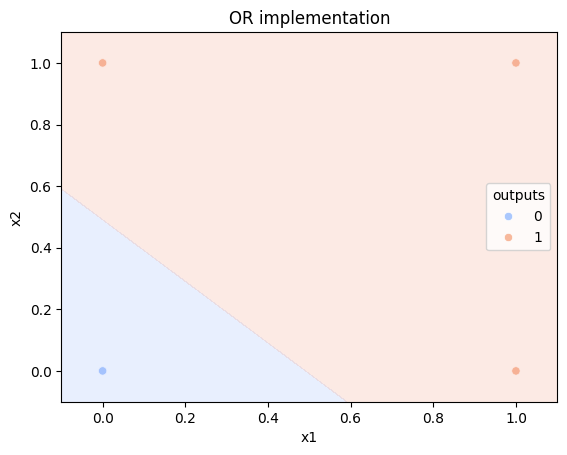

AND dataset accuracy: 1.00


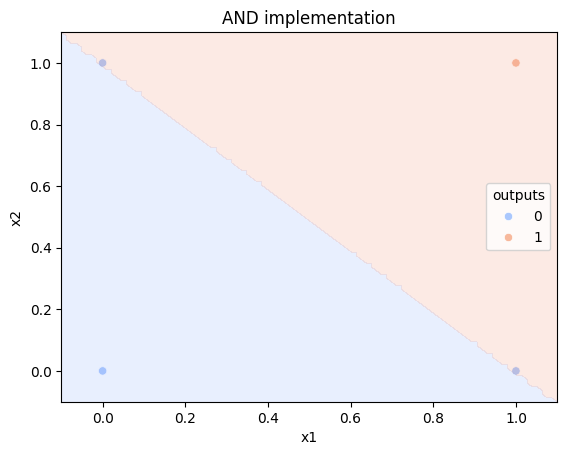

XOR dataset accuracy: 0.50


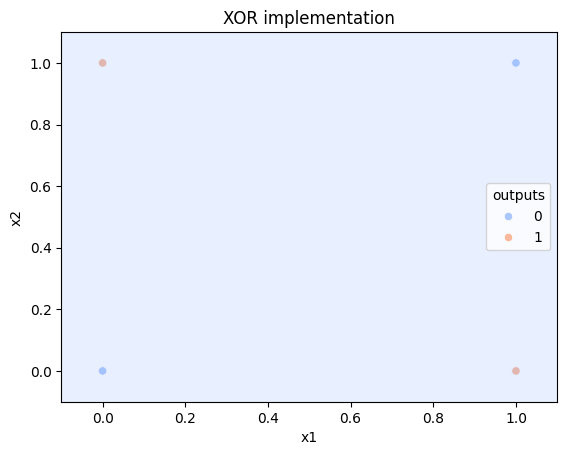

In [10]:
for dataset_name in datasets.keys():
  train_and_visualize(dataset_name)